Training the Models

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [67]:
df['total_score'] = df['math score'] +df['reading score'] + df['writing score']

In [68]:
X = df.drop(columns=['math score', 'reading score', 'writing score'], axis=1)

In [69]:
y = df['total_score']

In [70]:
from sklearn.model_selection import train_test_split


X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 6), (200, 6))

In [71]:
num_feature_col = X_train.select_dtypes(exclude="object").columns
cat_feature_col = X_train.select_dtypes(include='object').columns

In [72]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_feature = OneHotEncoder()
num_feature = StandardScaler()

process = ColumnTransformer([('OneHotEncoder', cat_feature, cat_feature_col),
                             ('StandardScaler', num_feature, num_feature_col)])

In [73]:
X_train = process.fit_transform(X_train)
X_test = process.transform(X_test)

In [74]:
def evalute_model(true, y_pred):
    mse = mean_squared_error(true, y_pred)
    mae = mean_absolute_error(true,y_pred)
    r2 = r2_score(true, y_pred)
    return mse, mae, r2

In [75]:
models = {
    "LinearRegression": LinearRegression(),
    "K-nearest": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForestRegressor": RandomForestRegressor(),
    "Adaboost": AdaBoostRegressor()
}

model_list = []
r2_list = []

for mod in range(len(list(models))):
    model = list(models.values())[mod]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mse, model_train_mae, model_train_r2 = evalute_model(y_train, y_train_pred)
    model_test_mse, model_test_mae, model_test_r2=evalute_model(y_test,y_test_pred)

    print(list(models.keys())[mod])
    model_list.append(list(models.keys())[mod])

    print("Model performance for Training set")
    print("Mean Squared Error:", model_train_mse)
    print("Mean absolute Error:", model_train_mae)
    print("R2 Score:", model_train_r2)

    print("Model performance for Test set")
    print("Mean Squared Error:", model_test_mse)
    print("Mean absolute Error:", model_test_mae)
    print("R2 Score:", model_test_r2)
    r2_list.append(model_test_r2)
    print("===============================")

LinearRegression
Model performance for Training set
Mean Squared Error: 1.3871330157406272e-27
Mean absolute Error: 2.7551294579097884e-14
R2 Score: 1.0
Model performance for Test set
Mean Squared Error: 1.627704037396827e-27
Mean absolute Error: 3.0553337637684307e-14
R2 Score: 1.0
K-nearest
Model performance for Training set
Mean Squared Error: 145.47295
Mean absolute Error: 9.165750000000001
R2 Score: 0.9189586029550354
Model performance for Test set
Mean Squared Error: 227.17000000000004
Mean absolute Error: 10.936
R2 Score: 0.8822525755596942
DecisionTreeRegressor
Model performance for Training set
Mean Squared Error: 0.0
Mean absolute Error: 0.0
R2 Score: 1.0
Model performance for Test set
Mean Squared Error: 4.37
Mean absolute Error: 0.23
R2 Score: 0.997734928710639
Ridge
Model performance for Training set
Mean Squared Error: 0.0037387331630008348
Mean absolute Error: 0.04981351627208531
R2 Score: 0.9999979171924491
Model performance for Test set
Mean Squared Error: 0.0045158410

RandomForestRegressor
Model performance for Training set
Mean Squared Error: 0.09468199999999992
Mean absolute Error: 0.05977499999999886
R2 Score: 0.999947253688366
Model performance for Test set
Mean Squared Error: 7.510116499999999
Mean absolute Error: 0.3173499999999989
R2 Score: 0.9961073342645523
Adaboost
Model performance for Training set
Mean Squared Error: 13.577752561860606
Mean absolute Error: 2.933779937203728
R2 Score: 0.9924359818348083
Model performance for Test set
Mean Squared Error: 19.21190244302512
Mean absolute Error: 2.9409855690298046
R2 Score: 0.9900420300600228


In [76]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model name', 'r2_score']).sort_values(by=['r2_score'], ascending=False)

,Model name,r2_score
0,LinearRegression,1.000000
3,Ridge,0.999998
4,Lasso,0.999433
2,DecisionTreeRegressor,0.997735
5,RandomForestRegressor,0.996107
6,Adaboost,0.990042
1,K-nearest,0.882253


In [77]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy %.2f:" %score)

Accuracy 100.00:


Text(0, 0.5, 'Predicted')

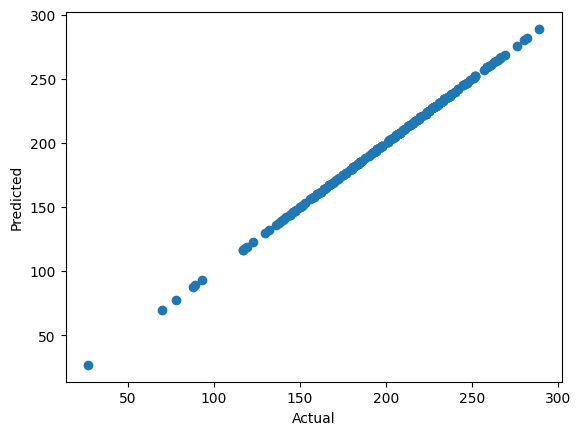

In [78]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [79]:
pred_diff = pd.DataFrame({'Actual value': y_test, 'predicted_value':y_pred,'Difference':y_test-y_pred})
pred_diff

,Actual value,predicted_value,Difference
521,261,261.0,-5.684342e-14
737,192,192.0,0.000000e+00
740,225,225.0,0.000000e+00
660,224,224.0,-5.684342e-14
411,245,245.0,-2.842171e-14
...,...,...,...
408,165,165.0,5.684342e-14
332,171,171.0,5.684342e-14
208,231,231.0,-5.684342e-14
613,216,216.0,-2.842171e-14


In [80]:
model = LinearRegression()

In [81]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-val R² scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-val R² scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
